## Section 1
In class, we discussed how the XOR function is a classic example of what a single perceptron with a linear activation function cannot solve. It turns out that in order to compute XOR, we need to start using *non-linear* functions.

This problem is solvable, but requires additional tools. It can be solved using multi-layered networks, or with the addtion of *backpropigation*, a construct involving the use of linear algerbra to work back up the network from the result and adjust the weight at each node based on how the network travesed the gradient of the problem space.

## Section 2
Use Python/NumPy/Pandas/Keras to load and manipulate the Boston Housing Dataset as follows.

In [1]:
# Import needed frameworks. Note that Tensorflow is automatically imported by Keras at this step.
# Code based on usage example from https://keras.io/datasets/
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from keras.datasets import boston_housing

(x_train, y_train), (x_test, y_test) = boston_housing.load_data()

Using TensorFlow backend.


**a.** Compute the dimensions of the data structures. Include code to print these values. 

In [2]:
print("=== Training Data ===")
print("Demensions:\t%sx%s" % (x_train.ndim, y_train.ndim))
print("Size:\t\t%s(x), %s(y)" % (x_train.size, y_train.size))
print("X shape:\t",(x_train.shape))
print("Y shape:\t",(y_train.shape))

print("\n===== Test Data =====")
print("Demensions:\t%sx%s" % (x_test.ndim, y_test.ndim))
print("Size:\t\t%s(x), %s(y)" % (x_test.size, y_test.size))
print("X shape:\t",(x_test.shape))
print("Y shape:\t",(y_test.shape))

=== Training Data ===
Demensions:	2x1
Size:		5252(x), 404(y)
X shape:	 (404, 13)
Y shape:	 (404,)

===== Test Data =====
Demensions:	2x1
Size:		1326(x), 102(y)
X shape:	 (102, 13)
Y shape:	 (102,)


**b.** Construct a suitable testing set, training set, and validation set for this data. Submit code to create these datasets but do not include the datasets themselves. 

Given that the keras constructor for the boston_housing set is already split into training and testing, I will only need to create the validation set, which I'll do by splitting the test set:

In [3]:
import math
''' 
WARNING: Running this multiple times will repeatedly modify the sets.
Be sure to re-run ALL cells if you re-run this section.
'''
x_val = x_test[0:51]
x_test = x_test[51:]

y_val = y_test[0:51]
y_test = y_test[51:]

print("Modified Test/Validation Data:")
print("x_val shape:\t", (x_val.shape))
print("y_val shape:\t", (y_val.shape))

Modified Test/Validation Data:
x_val shape:	 (51, 13)
y_val shape:	 (51,)


**c.** Create one new synthetic feature that could be useful for machine learning in this domain. Explain what it is and why it might be useful, and submit code to add it to the dataset. 

Using the information from the [sckit page on this dataset][1], I was able to construct the data with labels for easier sythensizing. I plotted some variables together and noticed a correlation between crime and access to highways. I created a synthetic feature by dividing crime by the RAD feature to see if that would perhaps tease out more subtlties by emphasizing crime rate not near highways.

[1]:https://scikit-learn.org/stable/datasets/index.html#boston-house-prices-dataset


['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,CRIMRAD
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,0.06263
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,0.04527
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,0.06076
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,0.10959
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88,0.04741


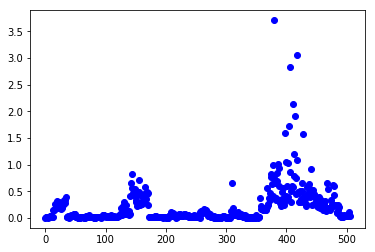

In [4]:
from sklearn.datasets import load_boston
sk_data = load_boston().data
sk_labels = load_boston().feature_names
print(sk_labels)
# Construct a Pandas DataFrame, using example from https://colab.research.google.com/notebooks/mlcc/intro_to_pandas.ipynb
# Additional documentation from http://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html#pandas.DataFrame
labeled_data = pd.DataFrame(data=sk_data, columns=sk_labels)

labeled_data['CRIMRAD'] = labeled_data['CRIM'] / labeled_data['RAD']

plt.plot(labeled_data['CRIMRAD'],'bo')

labeled_data.tail()